In [1]:
%cd ..

/home/dawood/Workspace/face-keypoints


In [2]:
import cv2
import torch

from data.ls3d import LS3D
from models.fpn import FPN as Model

from torch.nn import functional as F
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
model = Model(68)

In [4]:
preds = model(torch.randn(1,3,512,512))
for i in preds:
    print(i.shape)

torch.Size([1, 68, 16, 16])
torch.Size([1, 68, 32, 32])
torch.Size([1, 68, 64, 64])
torch.Size([1, 68, 128, 128])


In [5]:
data = LS3D('/media/SSD2/LS3D-W/300VW-3D/Trainset/', augment=False)

model = Model(68).cuda()

In [6]:
%time img, hm_gt = data[0]

CPU times: user 509 ms, sys: 216 ms, total: 725 ms
Wall time: 710 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


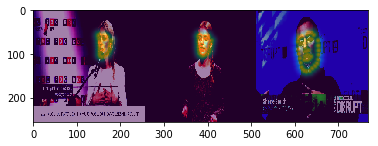

In [7]:
plt.imshow(img.permute(1,2,0).contiguous().numpy() )
plt.imshow(hm_gt[:68].max(0)[0].numpy(), alpha=0.5)

In [8]:
preds = model(img.unsqueeze(0).cuda())

In [9]:
preds[-1][0][:68].shape

torch.Size([68, 64, 192])

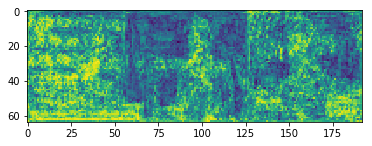

In [10]:
plt.imshow(preds[-1][0, :68].max(0)[0].cpu().detach().numpy())

In [11]:
model.calc_loss(preds, hm_gt.unsqueeze(0).cuda(), mask.unsqueeze(0).cuda())

NameError: name 'mask' is not defined

In [ ]:
mask.sum()